# Bibliotecas

In [89]:
# Importando Tkinter para fazer a Interface!
from tkinter import *
from tkinter import ttk
from tkcalendar import Calendar

import sys

# Importando Matplotlib para montar os gráficos!
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.dates import DateFormatter, AutoDateLocator, num2date

# Importando Selenium e Webdriver Manager para webscraping
from selenium import webdriver  
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.common.by import By  
from selenium.webdriver.support.ui import WebDriverWait  
from selenium.webdriver.support import expected_conditions as EC  

from webdriver_manager.chrome import ChromeDriverManager

# Importando Yfinance para obter cotação das ações
import yfinance

# Importando Datetime para obter data atual
import datetime

# Importar pandas para lidar com timestamps
import pandas as pd  

import numpy as np

# Inicializando Navegador Chrome Selenium

In [90]:
service = Service(ChromeDriverManager().install())  

options = webdriver.ChromeOptions()
options.add_argument("--headless")

driver = webdriver.Chrome(service=service, options=options)

# Criação da Interface

## Telas

In [91]:
# Criando e configurando janela do Aplicativo!

aplicativo = Tk() # Instancia a Janela
aplicativo.title("WikiBank")
aplicativo.geometry("1280x750")
aplicativo.resizable(False, False)

# Tela inicial
tela_inicial = Canvas(aplicativo)
tela_inicial.pack(side="left", fill="both", expand=True)

frame_inicial = Frame(tela_inicial, width=1280, height=750, bg="white", relief="flat")
frame_inicial.pack()

banco_entry_inicial = Entry(frame_inicial, relief="flat", bg="#c9c9c9", justify="center", width=20, font=("Ivy 12 bold"))
banco_entry_inicial.place(relx=0.5, rely=0.5, anchor="center")

botao_buscar_inicial = Button(frame_inicial, width=10, text="Buscar")
botao_buscar_inicial.place(relx=0.5, rely=0.55, anchor="center") 

# Tela De Informação

tela_informacao = Canvas(aplicativo)

frame_search = Frame(tela_informacao, width=1280, height=100, bg="white", relief="flat")
frame_search.grid(row=0, column=0)

frame_info = Frame(tela_informacao, width=1280, height=635, relief="flat")
frame_info.grid(row=1, column=0, pady=15 ,sticky=NW)

nome_banco = Label(frame_search, text="CAIXA", relief="flat", fg="black", bg="white", justify="center", font=("Ivy 14 bold"))
nome_banco.place(x=0, rely=0.5)

erro_label_inicial = Label(frame_inicial, text="" ,relief="flat", fg="red" ,bg="white", justify="center", font=("Ivy 8"))
erro_label_inicial.place(relx=0.5, rely=0.47, anchor="center")

erro_label_search = Label(frame_search, text="" ,relief="flat", fg="red" ,bg="white", justify="center", font=("Ivy 8"))
erro_label_search.place(relx=0.5, y=25, anchor="center")

banco_entry = Entry(frame_search, relief="flat", bg="#c9c9c9", justify="center")
banco_entry.place(relx=0.5, rely=0.5, anchor="center")

botao_informacoesPrincipais = Button(frame_search, width=10, text="Principal")
botao_informacoesPrincipais.place(x=0, y=75) 

botao_lucroLiquido = Button(frame_search, width=20, text="Historico Lucro Liquido")
botao_lucroLiquido.place(x=80, y=75) 

botao_buscar = Button(frame_search, width=10, text="Buscar")
botao_buscar.place(relx=0.5, rely=0.8, anchor="center") 

botao_cotacao = Button(frame_search, width=15, text="Cotação Das Ações")

# Tela Cotação das ações

frame_cotacao = Frame(tela_informacao, width=1280, height=750, bg="white", relief="flat")

data_incial = None
data_final = None

titulo_calendario_final = Label(frame_cotacao, text="Data Final", relief="flat", fg="black", bg="white", justify="center", font=("Ivy 14 bold"))
titulo_calendario_final.place(x=1080, rely=0.16, anchor='center')
calendario_final = Calendar(frame_cotacao, selectmode="day", date_pattern='dd/mm/y', maxdate=datetime.datetime.now().date(), showothermonthdays=False, showweeknumbers=False, month=6, year=2023, day=23)
calendario_final.place(x=1080, rely=0.3, anchor='center')

titulo_calendario_inicial = Label(frame_cotacao, text="Data Inicial", relief="flat", fg="black", bg="white", justify="center", font=("Ivy 14 bold"))
titulo_calendario_inicial.place(x=200, rely=0.16, anchor='center')
calendario_inicial = Calendar(frame_cotacao, selectmode="day", date_pattern='dd/mm/y', showothermonthdays=False, showweeknumbers=False, month=6, year=2022, day=23)
calendario_inicial.place(x=200, rely=0.3, anchor='center')

botao_buscar_cotacao = Button(frame_cotacao, width=20, text="Buscar Cotação")
botao_buscar_cotacao.place(x= 1080, rely=0.5, anchor="center")

# Tela Historico Lucro Liquido

frame_lucroliquido = Frame(tela_informacao, width=1280, height=750, bg="white", relief="flat")

## Colocando Informações Na Interface

In [92]:
def main_info(mainInfos):
    # Publicação Frame
    
    frame_publi = Frame(frame_info, width=200, height=90, bg="white", relief="flat")
    frame_publi.place(x=15, y=0)
    
    tracin = Label(frame_publi, text="" ,height=10, bg="green", relief="flat", font=("Ivy 1 bold"))
    tracin.place(x=0, y=0)
    
    publi_nome = Label(frame_publi, text="Publicação" ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 14 bold"))
    publi_nome.place(x=12, y=0)
    
    publi_value = Label(frame_publi, text=mainInfos[0].text ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 18 bold"), justify="center")
    publi_value.place(relx=0.5, rely=0.7, anchor="center")
    
    # Lucro Liquido Frame
    
    frame_lucroliqui = Frame(frame_info, width=200, height=90, bg="white", relief="flat")
    frame_lucroliqui .place(x=230, y=0)
    
    tracin = Label(frame_lucroliqui , text="" ,height=10, bg="green", relief="flat", font=("Ivy 1 bold"))
    tracin.place(x=0, y=0)
    
    lucroliqui_nome = Label(frame_lucroliqui , text="Lucro Liquido (R$)" ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 14 bold"))
    lucroliqui_nome.place(x=12, y=0)
    
    lucroliqui_value = Label(frame_lucroliqui , text=mainInfos[1].text ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 18 bold"), justify="center")
    lucroliqui_value.place(relx=0.5, rely=0.7, anchor="center")
    
    # Patrimonio Liquido Frame
    
    frame_pratiliqui = Frame(frame_info, width=200, height=90, bg="white", relief="flat")
    frame_pratiliqui.place(x=445, y=0)
    
    tracin = Label(frame_pratiliqui, text="" ,height=10, bg="green", relief="flat", font=("Ivy 1 bold"))
    tracin.place(x=0, y=0)
    
    pratiliqui_nome = Label(frame_pratiliqui, text="Patrimonio Liquido (R$)" ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 12 bold"))
    pratiliqui_nome.place(x=12, y=2)
    
    pratiliqui_value = Label(frame_pratiliqui, text=mainInfos[2].text ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 18 bold"), justify="center")
    pratiliqui_value.place(relx=0.5, rely=0.7, anchor="center")
    
    # Ativo Total Frame
    
    frame_ativototal = Frame(frame_info, width=200, height=90, bg="white", relief="flat")
    frame_ativototal.place(x=15, y=105)
    
    tracin = Label(frame_ativototal  , text="" ,height=10, bg="green", relief="flat", font=("Ivy 1 bold"))
    tracin.place(x=0, y=0)
    
    ativototal_nome = Label(frame_ativototal  , text="Ativo Total (R$)" ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 14 bold"))
    ativototal_nome.place(x=12, y=0)
    
    ativototal_value = Label(frame_ativototal  , text=mainInfos[3].text ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 18 bold"), justify="center")
    ativototal_value.place(relx=0.5, rely=0.7, anchor="center")
    
    # Captações Frame
    
    frame_captacoes = Frame(frame_info, width=200, height=90, bg="white", relief="flat")
    frame_captacoes.place(x=230, y=105)
    
    tracin = Label(frame_captacoes, text="" ,height=10, bg="green", relief="flat", font=("Ivy 1 bold"))
    tracin.place(x=0, y=0)
    
    captacoes_nome = Label(frame_captacoes, text="Captações (R$)" ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 14 bold"))
    captacoes_nome.place(x=12, y=0)
    
    captacoes_value = Label(frame_captacoes, text=mainInfos[4].text ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 18 bold"), justify="center")
    captacoes_value.place(relx=0.5, rely=0.7, anchor="center")
    
    # Carteira de crédito classificada Frame
    
    frame_cartcred = Frame(frame_info, width=200, height=90, bg="white", relief="flat")
    frame_cartcred  .place(x=445, y=105) 
    
    tracin = Label(frame_cartcred  , text="" ,height=17, bg="green", relief="flat", font=("Ivy 1 bold"))
    tracin.place(x=0, y=0)
    
    cartcred_nome = Label(frame_cartcred  , text="Carteira De Crédito\nClassificada (R$)" ,height=2, bg="white", fg="gray", relief="flat", font=("Ivy 12 bold"), justify="left")
    cartcred_nome.place(x=12, y=0)
    
    cartcred_value = Label(frame_cartcred  , text=mainInfos[5].text ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 18 bold"), justify="center")
    cartcred_value.place(relx=0.5, rely=0.7, anchor="center")
    
    # Patrimonio De Referencia RWA Frame
    
    frame_patriref = Frame(frame_info, width=200, height=90, bg="white", relief="flat")
    frame_patriref  .place(x=15, y=210)
    
    tracin = Label(frame_patriref  , text="" ,height=17, bg="green", relief="flat", font=("Ivy 1 bold"))
    tracin.place(x=0, y=0)
    
    patriref_nome = Label(frame_patriref  , text="Patrimonio De\nReferencia RWA (R$)" ,height=2, bg="white", fg="gray", relief="flat", font=("Ivy 12 bold"), justify="left")
    patriref_nome.place(x=12, y=0)
    
    patriref_value = Label(frame_patriref  , text=mainInfos[6].text ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 18 bold"), justify="center")
    patriref_value.place(relx=0.5, rely=0.7, anchor="center")
    
    # Numeros De Agencias Frame
    
    frame_numagencias = Frame(frame_info, width=200, height=90, bg="white", relief="flat")
    frame_numagencias.place(x=230, y=210)
    
    tracin = Label(frame_numagencias, text="" ,height=10, bg="green", relief="flat", font=("Ivy 1 bold"))
    tracin.place(x=0, y=0)
    
    numagencias_nome = Label(frame_numagencias, text="Numeros De Agencias" ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 13 bold"))
    numagencias_nome.place(x=12, y=0)
    
    numagencias_value = Label(frame_numagencias, text=mainInfos[7].text ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 18 bold"), justify="center")
    numagencias_value.place(relx=0.5, rely=0.7, anchor="center")
    
    # Numero De Ponto De Atendimento Frame
    
    frame_numatendimento = Frame(frame_info, width=200, height=90, bg="white", relief="flat")
    frame_numatendimento  .place(x=445, y=210)
    
    tracin = Label(frame_numatendimento  , text="" ,height=17, bg="green", relief="flat", font=("Ivy 1 bold"))
    tracin.place(x=0, y=0)
    
    numatendimento_nome = Label(frame_numatendimento  , text="Numero De Pontos\nDe Atendimento" ,height=2, bg="white", fg="gray", relief="flat", font=("Ivy 12 bold"), justify="left")
    numatendimento_nome.place(x=12, y=0)
    
    numatendimento_value = Label(frame_numatendimento  , text=mainInfos[8].text ,height=1, bg="white", fg="gray", relief="flat", font=("Ivy 18 bold"), justify="center")
    numatendimento_value.place(relx=0.5, rely=0.7, anchor="center")

# Sistema De Alternar Entre As Telas

telas_canvas = {'tela_inicial':tela_inicial,
                'tela_informacao':tela_informacao
                }

telas_frames= {'tela_lucroLiquido':frame_lucroliquido,
                'tela_infoPrincipal':frame_info,
                'tela_cotacao':frame_cotacao
                }

def mostrar_tela(nome_tela):
    for tela, canvas in telas_canvas.items():
        if tela == nome_tela:
            canvas.pack(fill="both", expand=True)
        else:
            canvas.pack_forget()

def mostrar_tela_info(nome_tela):
    for tela, frames in telas_frames.items():
        if tela == nome_tela:
            frames.grid(row=1, column=0, pady=15 ,sticky=NW)
        else:
            frames.grid_forget()

def fechar_tudo():
    driver.quit()
    aplicativo.destroy()
    sys.exit()

aplicativo.protocol("WM_DELETE_WINDOW", fechar_tudo)

''

# Graficos e Tabelas (MATPLOTLIB)

## Graficos

In [93]:
frame_indicebasileia = Frame(frame_info, width=307, height=195, bg="white", relief="flat")
frame_indicebasileia.place(x=15, y=315)

frame_indiceimobilizacao = Frame(frame_info, width=307, height=195, bg="white", relief="flat")
frame_indiceimobilizacao.place(x=337, y=315)

indicebasileia_nome = None
indiceimobilizacao_nome = None

def indices(indicebasileia, indiceimobilizacao):
       # Indice De Basileia

       global indicebasileia_nome

       indiceBasileiaGrafico = plt.figure(figsize=(3, 3))
       
       if indicebasileia_nome == None:

              indicebasileia_nome = Label(frame_indicebasileia  , text="Indice de Basileia" ,height=2, bg="white", fg="gray", relief="flat", font=("Ivy 14 bold"), justify="left")
              indicebasileia_nome.place(x=12, y=-7)

              tracin = Label(frame_indicebasileia  , text="" ,height=10, bg="green", relief="flat", font=("Ivy 1 bold"))
              tracin.place(x=0, y=0)

       canvas_graph = FigureCanvasTkAgg(indiceBasileiaGrafico, master=frame_indicebasileia)
       canvas_graph.get_tk_widget().place(x=0, y=20)
       canvas_graph.draw()

       ax = indiceBasileiaGrafico.add_subplot(projection="polar")

       indicebasileia_nome.lift()

       valores = [100, 10, 25, 50, 15, 75, 0]
       
       indicebasileiaarrow = 3.14 - ((indicebasileia / 100) * 3.14)

       porcentagem_vermelho = 0.10
       porcentagem_amarelo = 0.05
       porcentagem_verde = 1 - porcentagem_vermelho - porcentagem_amarelo
       
       largura_vermelho = porcentagem_vermelho * 3.14
       largura_amarelo = porcentagem_amarelo * 3.14
       largura_verde = 3.14 - largura_vermelho - largura_amarelo
       
       x_verde = 0
       x_amarelo = largura_verde
       x_vermelho = 3.14 - largura_vermelho
       
       altura = 0.5 

       ax.bar(x=x_vermelho, width=largura_vermelho, height=altura, bottom=2,
              linewidth=3, edgecolor="white", color='#f36d54', align="edge")
       
       ax.bar(x=x_amarelo, width=largura_amarelo, height=altura, bottom=2,
              linewidth=3, edgecolor="white", color='#f6ff00', align="edge")
       
       ax.bar(x=x_verde, width=largura_verde, height=altura, bottom=2,
              linewidth=3, edgecolor="white", color='#4dab6d', align="edge")

       ax.set_axis_off()

       for loc, val in zip([0, 2.826, 2.355, 1.57, 2.669, 0.785 ,3.14], valores):
              plt.annotate(val, xy=(loc, 2.5), fontsize=5, ha="right" if val<=51 else "left")

       plt.annotate(indicebasileia, xytext=(0, 0), xy=(indicebasileiaarrow, 2.0),
                     arrowprops=dict(arrowstyle="wedge, tail_width=0.5", color="black", shrinkA=0), 
                     bbox=dict(boxstyle="circle", facecolor="black", linewidth=2.0), 
                     fontsize=10, color="white", ha="center")  

       # Indice De Imobilizacao

       global indiceimobilizacao_nome

       indiceImobilizacaoGrafico = plt.figure(figsize=(3, 3))

       if indiceimobilizacao_nome == None:
              indiceimobilizacao_nome = Label(frame_indiceimobilizacao  , text="Indice de Imobilização" ,height=2, bg="white", fg="gray", relief="flat", font=("Ivy 14 bold"), justify="left")
              indiceimobilizacao_nome.place(x=12, y=-7)

              tracin = Label(frame_indiceimobilizacao  , text="" ,height=10, bg="green", relief="flat", font=("Ivy 1 bold"))
              tracin.place(x=0, y=0)

       canvas_graph = FigureCanvasTkAgg(indiceImobilizacaoGrafico, master=frame_indiceimobilizacao)
       canvas_graph.draw()
       canvas_graph.get_tk_widget().place(x=0, y=20)

       indiceimobilizacao_nome.lift()

       indiceimobilizacaoarrow = 3.14 - ((indiceimobilizacao / 100) * 3.14)
       
       axImobilizacao = indiceImobilizacaoGrafico.add_subplot(projection="polar")
       
       porcentagem_verde = 0.45
       porcentagem_amarelo = 0.05
       
       largura_verde = porcentagem_verde * 3.14
       largura_amarelo = porcentagem_amarelo * 3.14
       largura_vermelho = 3.14 - largura_verde - largura_amarelo
       
       x_vermelho = 0
       x_amarelo = largura_vermelho
       x_verde = 3.14 - largura_verde
       
       altura = 0.5 
       
       axImobilizacao.bar(x=x_vermelho, width=largura_vermelho, height=altura, bottom=2,
              linewidth=3, edgecolor="white", color='#f36d54', align="edge")
       
       axImobilizacao.bar(x=x_amarelo, width=largura_amarelo, height=altura, bottom=2,
              linewidth=3, edgecolor="white", color='#f6ff00', align="edge")
       
       axImobilizacao.bar(x=x_verde, width=largura_verde, height=altura, bottom=2,
              linewidth=3, edgecolor="white", color='#4dab6d', align="edge")
       
       for loc, val in zip([0, 2.826, 2.355, 1.57, 2.669, 0.785 ,3.14], valores):
           plt.annotate(val, xy=(loc, 2.5), fontsize=5, ha="right" if val<=51 else "left")
       
       plt.annotate(indiceimobilizacao, xytext=(0, 0), xy=(indiceimobilizacaoarrow, 2.0),
                     arrowprops=dict(arrowstyle="wedge, tail_width=0.5", color="black", shrinkA=0), 
                     bbox=dict(boxstyle="circle", facecolor="black", linewidth=2.0), 
                     fontsize=10, color="white", ha="center")  
       
       axImobilizacao.set_axis_off()


In [94]:
# Grafico do Historico do Lucro Liquido

def montarGraficoLucroLiquido(valoresGraficoLucroLiquido, valoresLucroLiquidoGrafico):

    GraficoLucroLiquido = plt.figure(figsize=(6, 2.5), dpi=100)
    canvas_graficoLucroLiquido = FigureCanvasTkAgg(GraficoLucroLiquido, master=frame_lucroliquido)
    canvas_graficoLucroLiquido.draw()
    canvas_graficoLucroLiquido.get_tk_widget().place(relx=0.5, rely=0.25, anchor="center")
    
    plt.plot(valoresLucroLiquidoGrafico, 'o-r')
    plt.xlabel('Ano')
    plt.ylabel('Valor (R$)')
    plt.xticks([0, 1, 2, 3], [2020, 2021, 2022, 2023])
    plt.yticks(valoresGraficoLucroLiquido, valoresGraficoLucroLiquido)
    plt.grid(True)
    plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

In [95]:
info_legenda = None

def cotacao_acao_grafico(cotacao_acao):

    global info_legenda

    if info_legenda == None:
        info_legenda = Label(frame_cotacao, text="Data: | Fechamento: ", bg="white", relief="flat", font=("Ivy 12 bold"))
        info_legenda.place(relx=0.5, rely=0.5, anchor='center')

    graficoCotacao = plt.figure(figsize=(6, 4))
    ax = graficoCotacao.add_subplot(111)
    ax.plot(cotacao_acao.index, cotacao_acao['Close'], label='Fechamento')

    ax.xaxis.set_major_locator(AutoDateLocator())
    graficoCotacao.autofmt_xdate()

    canvas_graficoCotacao = FigureCanvasTkAgg(graficoCotacao, master=frame_cotacao)
    canvas_graficoCotacao.draw()
    canvas_graficoCotacao.get_tk_widget().place(relx=0.5, rely=0.23, anchor='center')

    info_legenda.config(text="Data: | Fechamento: ")
    info_legenda.lift()

    calendario_inicial.lift()
    calendario_final.lift()
    titulo_calendario_inicial.lift()
    titulo_calendario_final.lift()

    def cotacao_info(event):
        if event.inaxes:
            x = event.xdata
            mouse_timestamp = pd.Timestamp(num2date(x)).date()
            index_proximo = encontrar_indice_proximo(mouse_timestamp, cotacao_acao.index.date)
            data_proxima = cotacao_acao.index[index_proximo].strftime('%Y-%m-%d')
            fechamento_proximo = cotacao_acao['Close'].iloc[index_proximo]
            info_legenda.config(text=f'Data: {data_proxima} | Fechamento: {fechamento_proximo:.2f}')

    graficoCotacao.canvas.mpl_connect('motion_notify_event', cotacao_info)

def encontrar_indice_proximo(valor, cotacao):
    return np.abs(cotacao - valor).argmin()

## Tabelas

In [96]:
tabela_info = None
tabela = None
tabela_cotacaoAcoes = None

def tabela_info_func(sobrenomes, sobres):

    global tabela_info

    custom_style = ttk.Style()
    custom_style.configure('tabInfo.Treeview', font=("Ivy 10"))

    if tabela_info == None:
        tabela_info = ttk.Treeview(frame_info, columns=('infoName', 'info'), show='tree', style='tabInfo.Treeview')
        tabela_info.place(x=660, y=0, height=225)
    else:
        tabela_info.destroy()
        tabela_info = ttk.Treeview(frame_info, columns=('infoName', 'info'), show='tree', style='tabInfo.Treeview')
        tabela_info.place(x=660, y=0, height=225)

    tabela_info.column('#0', width=0, stretch=False)
    tabela_info.column('infoName', width=125)
    tabela_info.column('info', width=200)

    for sobrenome, sobre in zip(sobrenomes, sobres):
        palavras = sobre.text.split()
        if len(palavras) > 4:
            linhas_quebradas = [' '.join(palavras[i:i+4]) for i in range(0, len(palavras), 4)]
            printou_nome = False
            for linha in linhas_quebradas:
                if printou_nome == False:
                    tabela_info.insert('', 'end', values=(sobrenome.text, linha.strip()))
                    printou_nome = True
                else:
                    tabela_info.insert('', 'end', values=('', linha.strip()))
        else:
            tabela_info.insert('', 'end', values=(sobrenome.text, sobre.text))

def tabela_lucroLiquido(anosLucroLiquido, resultadosLucroLiquido, valoresLucroLiquido):

    global tabela

    if tabela == None:
        tabela = ttk.Treeview(frame_lucroliquido, columns=('ano', 'resultado', 'valores'), show='headings', style='TabLucro.Treeview')
        tabela.place(relx=0.5, rely=0.53, height=115, anchor="center")
    else:
        tabela.destroy()
        tabela = ttk.Treeview(frame_lucroliquido, columns=('ano', 'resultado', 'valores'), show='headings', style='TabLucro.Treeview')
        tabela.place(relx=0.5, rely=0.53, height=115, anchor="center")

    custom_style2 = ttk.Style()
    custom_style2.configure('TabLucro.Treeview', font=("Ivy 12"))
    custom_style2.configure('TabLucro.Treeview.Heading', font=("Ivy 12"))

    tabela.column('#0', width=0, stretch=False)
    tabela.column('ano', width=164)
    tabela.column('resultado', width=164)
    tabela.column('valores', width=164)
    tabela.heading('ano', text='Ano')
    tabela.heading('resultado', text='Resultado')
    tabela.heading('valores', text='Valor (R$)')
    
    for ano, resultado, valores in zip(anosLucroLiquido, resultadosLucroLiquido, valoresLucroLiquido):
        tabela.insert('', 'end', values=(ano, resultado, valores))

def tabela_cotacao(cotacao_acao):

    global tabela_cotacaoAcoes

    if tabela_cotacaoAcoes == None:
        tabela_cotacaoAcoes = ttk.Treeview(frame_cotacao)
        tabela_cotacaoAcoes.place(relx=0.5, y=505, height=210, anchor='center') 
    else:
        tabela_cotacaoAcoes.destroy()
        tabela_cotacaoAcoes = ttk.Treeview(frame_cotacao)
        tabela_cotacaoAcoes.place(relx=0.5, y=505, height=210, anchor='center') 

    tabela_cotacaoAcoes["columns"] = tuple(['Data'] + list(cotacao_acao.columns))
    tabela_cotacaoAcoes["show"] = "headings"
    
    tabela_cotacaoAcoes.heading("Data", text="Data")
    for column in cotacao_acao.columns:
        tabela_cotacaoAcoes.heading(column, text=column)
    
    for column in tabela_cotacaoAcoes["columns"]:
        tabela_cotacaoAcoes.column(column, width=150)
    
    for index, row in cotacao_acao.iterrows():
        tabela_cotacaoAcoes.insert("", "end", values=tuple([index.strftime('%Y-%m-%d')] + list(row)))


# WebScraping

In [97]:
banco_pesquisado = None

def main(banco):

    global data_final
    global data_inicial

    data_final = datetime.datetime.strptime(calendario_final.get_date(), "%d/%m/%Y").strftime("%Y-%m-%d")
    data_inicial = datetime.datetime.strptime(calendario_inicial.get_date(), "%d/%m/%Y").strftime("%Y-%m-%d")

    erro_label_search.configure(text="")
    erro_label_inicial.configure(text="")

    mapeamento_bancos = {
        "paypal": "10878448",
        "banco do brasil": "bb",
        "inter": "intermedium",
        "caixa": "caixa-economica-federal",
    }

    if banco in mapeamento_bancos: 
        banco_url = mapeamento_bancos[banco]  
        if verificar_banco_existente(banco_url): 
            obter_informacoes_banco(banco_url)
        else: 
            erro_label_inicial.configure(text="Banco Não Encontrado Ou Não Existente!")
            erro_label_search.configure(text="Banco Não Encontrado Ou Não Existente!")
    else: 
        if verificar_banco_existente(banco): 
            obter_informacoes_banco(banco)
        else: 
            erro_label_inicial.configure(text="Banco Não Encontrado Ou Não Existente!")
            erro_label_search.configure(text="Banco Não Encontrado Ou Não Existente!")

def verificar_banco_existente(banco): 
    linkbase = 'https://bancodata.com.br/relatorio/' 
    url = linkbase + banco + "/" 
    driver.get(url)  

    try: 
        WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.TAG_NAME, 'h2')))
        return True 
    except:  
        return False 

def obter_informacoes_banco(banco_url):
    linkbase = 'https://bancodata.com.br/relatorio/'
    url = linkbase + banco_url + "/"  
    driver.get(url)  

    bankName = driver.find_elements(By.TAG_NAME, 'h2')[2] 
    nome_banco_text = bankName.text  
    if len(nome_banco_text) > 29:  
        nome_banco_text = nome_banco_text[:29] + "..."
    if nome_banco_text != "":
        nome_banco.configure(text=f"{nome_banco_text}") 
    tabela = driver.find_element(By.CLASS_NAME, 'statistics')  
    mainInfos = tabela.find_elements(By.CLASS_NAME, 'main-info') 
    tabelaIndices = driver.find_elements(By.CLASS_NAME, 'col-xs-6') 
    sobretabela = driver.find_elements(By.CLASS_NAME, 'table')
    sobres = sobretabela[0].find_elements(By.TAG_NAME, "td")
    sobrenomes = sobretabela[0].find_elements(By.TAG_NAME, "th")

    # Historico Lucro Liquido
    graficoLucroLiquido = driver.find_elements(By.ID, "graficoLucroLiquidoAnual")
    valoresGraficoLucroLiquidostr = [valor.text.split('\n')[1:] for valor in graficoLucroLiquido]
    valoresGraficoLucroLiquidostr = [valor for sublist in valoresGraficoLucroLiquidostr for valor in sublist]
    valoresGraficoLucroLiquidosPontuado = [numero.replace(".", "") for numero in valoresGraficoLucroLiquidostr]
    valoresGraficoLucroLiquidos = [int(valor) for valor in valoresGraficoLucroLiquidosPontuado[4:]]
    tabelaLucroLiquido = driver.find_elements(By.CLASS_NAME, "table-responsive")[0]

    linhas = tabelaLucroLiquido.find_elements(By.TAG_NAME, "tr")

    anosLucroLiquido = []
    resultadosLucroLiquido = []
    valoresLucroLiquido = []

    for linha in linhas[1:]:
        celulas = linha.find_elements(By.TAG_NAME, "td")

        anosLucroLiquido.append(celulas[0].text)
        resultadosLucroLiquido.append(celulas[1].text)
        valoresLucroLiquido.append(celulas[2].text)

    valoresLucroLiquidoGrafico = [float(valores.replace(" milhões", "").replace(",", ".") if "milhões" in valores else valores.replace(" bilhões", "00").replace(",", "").replace(" bilhão", "00")) for valores in valoresLucroLiquido]
    valoresLucroLiquidoGrafico.reverse()
    
    montarGraficoLucroLiquido(valoresGraficoLucroLiquidos, valoresLucroLiquidoGrafico)
    tabela_lucroLiquido(anosLucroLiquido, resultadosLucroLiquido, valoresLucroLiquido)
    
    tabela_info_func(sobrenomes, sobres)

    porcentagemIndices = [indice.find_elements(By.TAG_NAME, 'text')[11].text for indice in tabelaIndices]

    if len(porcentagemIndices) >= 1: 
        indices(float(porcentagemIndices[0].replace('%', '').replace(',', '.')), float(porcentagemIndices[1].replace('%', '').replace(',', '.')))
    else:
        indices(0, 0)

    mostrar_tela("tela_informacao")
    main_info(mainInfos)

def cotacao(banco):

    bancos_yahoo_finance = {
        "nubank": "NU",
        "itau": "ITUB4.SA",
        "banco do brasil": "BBAS3.SA",
        "bradesco": "BBD",              
    }

    if banco in bancos_yahoo_finance:

        botao_cotacao.place_forget()
        botao_cotacao.place(x=1168, y=75) 
        botao_cotacao.config( command=lambda: mostrar_tela_info("tela_cotacao"))

        data_final = datetime.datetime.strptime(calendario_final.get_date(), "%d/%m/%Y").strftime("%Y-%m-%d")
        data_inicial = datetime.datetime.strptime(calendario_inicial.get_date(), "%d/%m/%Y").strftime("%Y-%m-%d")

        cotacao_acao = yfinance.download(bancos_yahoo_finance[banco], start=data_inicial, end=data_final, progress=False)

        cotacao_acao_grafico(cotacao_acao)

        tabela_cotacao(cotacao_acao)
    else:
        botao_cotacao.place_forget()
        mostrar_tela_info("tela_infoPrincipal")

# Configurando Funções Dos Botões

In [98]:
# Tela Inicial
botao_buscar_inicial.config(command=lambda: (main(banco_entry_inicial.get().lower()), cotacao(banco_entry_inicial.get().lower()), pesquisa_inicial()))
banco_entry_inicial.bind('<Return>', lambda event: (main(banco_entry_inicial.get().lower()), cotacao(banco_entry_inicial.get().lower()), pesquisa_inicial()))

def pesquisa_inicial():
    global banco_pesquisado

    banco_entry.delete(0, 'end')
    banco_entry.insert(0, banco_entry_inicial.get().lower())

    banco_pesquisado = banco_entry_inicial.get().lower()

def pesquisa_apos():
    global banco_pesquisado

    banco_pesquisado = banco_entry.get().lower()

# Tela De Informação
botao_buscar.config(command=lambda: (main(banco_entry.get().lower()), cotacao(banco_entry.get().lower()), pesquisa_apos()))
banco_entry.bind('<Return>', lambda event: (main(banco_entry.get().lower()), cotacao(banco_entry.get().lower()), pesquisa_apos()))

botao_informacoesPrincipais.config( command=lambda: mostrar_tela_info("tela_infoPrincipal"))

botao_lucroLiquido.config( command=lambda: mostrar_tela_info("tela_lucroLiquido"))

botao_buscar_cotacao.config( command=lambda: cotacao(banco_pesquisado))

# Inicialização Do Programa

SystemExit: 

C:\Users\mauri\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


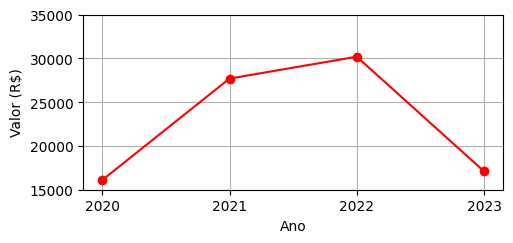

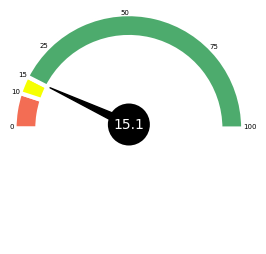

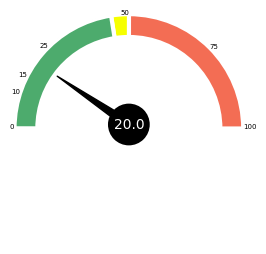

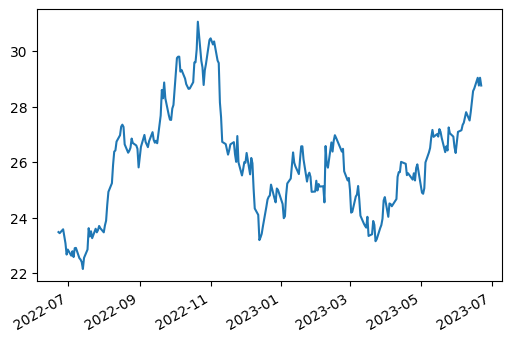

In [99]:
mostrar_tela("tela_inicial")
aplicativo.mainloop()